In [1]:
import os
import pandas as pd

# Load data from weeks 3 to 9
weeks = range(3, 10)
all_weeks = []

for week in weeks:
    df = pd.read_csv(f'archive/nfloffenseweek{week}.csv')
    df['Week'] = week
    all_weeks.append(df)

# Combine into one DataFrame
df_all = pd.concat(all_weeks, ignore_index=True)

In [2]:
df_all.columns

Index(['rank', 'team', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       '1st_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'Week'],
      dtype='object')

In [3]:
df_all = df_all.drop(columns=['rank'])

In [4]:
df_all.columns

Index(['team', 'games', 'points_scored', 'total_yards', 'offensive_plays',
       'yards_per_play', 'turnovers_lost', 'fumbles_lost', '1st_downs',
       'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'Week'],
      dtype='object')

In [5]:
df_team_avg = df_all.groupby('team').mean(numeric_only=True).reset_index()
df_team_avg.head()

,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Week
0,Arizona Cardinals,6.000000,130.000000,2073.285714,426.285714,4.857143,4.714286,1.000000,129.428571,165.857143,...,5.428571,4.385714,45.714286,40.142857,351.000000,8.142857,34.314286,6.642857,16.620000,6.0
1,Atlanta Falcons,6.000000,146.714286,1952.714286,350.714286,5.614286,8.714286,4.285714,121.428571,84.285714,...,7.714286,4.900000,54.000000,26.571429,203.857143,14.142857,41.042857,15.014286,43.617143,6.0
2,Baltimore Ravens,6.000000,162.571429,2142.714286,355.000000,6.142857,7.000000,2.000000,121.000000,109.714286,...,4.857143,5.557143,54.000000,29.714286,236.571429,9.142857,43.800000,10.757143,45.147143,6.0
3,Buffalo Bills,5.571429,161.714286,2401.571429,370.000000,6.457143,9.571429,5.142857,134.142857,147.714286,...,3.142857,4.900000,38.714286,32.571429,216.857143,9.714286,46.442857,16.642857,74.108571,6.0
4,Carolina Panthers,6.000000,113.857143,1669.714286,327.428571,5.057143,7.571429,3.000000,84.142857,100.857143,...,4.142857,4.571429,31.714286,32.285714,314.571429,8.571429,31.285714,9.514286,-32.591429,6.0


In [6]:
playoff_teams = [
    'Kansas City Chiefs', 'Philadelphia Eagles', 'Buffalo Bills', 'Cincinnati Bengals',
    'San Francisco 49ers', 'Dallas Cowboys', 'Minnesota Vikings', 'Jacksonville Jaguars',
    'Baltimore Ravens', 'Los Angeles Chargers', 'New York Giants', 'Tampa Bay Buccaneers',
    'Miami Dolphins', 'Seattle Seahawks'
]

df_team_avg['Made_Playoffs'] = df_team_avg['team'].apply(lambda x: 1 if x in playoff_teams else 0)


In [7]:
df_team_avg.head()

,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,...,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Week,Made_Playoffs
0,Arizona Cardinals,6.000000,130.000000,2073.285714,426.285714,4.857143,4.714286,1.000000,129.428571,165.857143,...,4.385714,45.714286,40.142857,351.000000,8.142857,34.314286,6.642857,16.620000,6.0,0
1,Atlanta Falcons,6.000000,146.714286,1952.714286,350.714286,5.614286,8.714286,4.285714,121.428571,84.285714,...,4.900000,54.000000,26.571429,203.857143,14.142857,41.042857,15.014286,43.617143,6.0,0
2,Baltimore Ravens,6.000000,162.571429,2142.714286,355.000000,6.142857,7.000000,2.000000,121.000000,109.714286,...,5.557143,54.000000,29.714286,236.571429,9.142857,43.800000,10.757143,45.147143,6.0,1
3,Buffalo Bills,5.571429,161.714286,2401.571429,370.000000,6.457143,9.571429,5.142857,134.142857,147.714286,...,4.900000,38.714286,32.571429,216.857143,9.714286,46.442857,16.642857,74.108571,6.0,1
4,Carolina Panthers,6.000000,113.857143,1669.714286,327.428571,5.057143,7.571429,3.000000,84.142857,100.857143,...,4.571429,31.714286,32.285714,314.571429,8.571429,31.285714,9.514286,-32.591429,6.0,0


In [8]:
X = df_team_avg.drop(columns=['team', 'Made_Playoffs', 'Week'])
y = df_team_avg['Made_Playoffs']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
ROC AUC Score: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



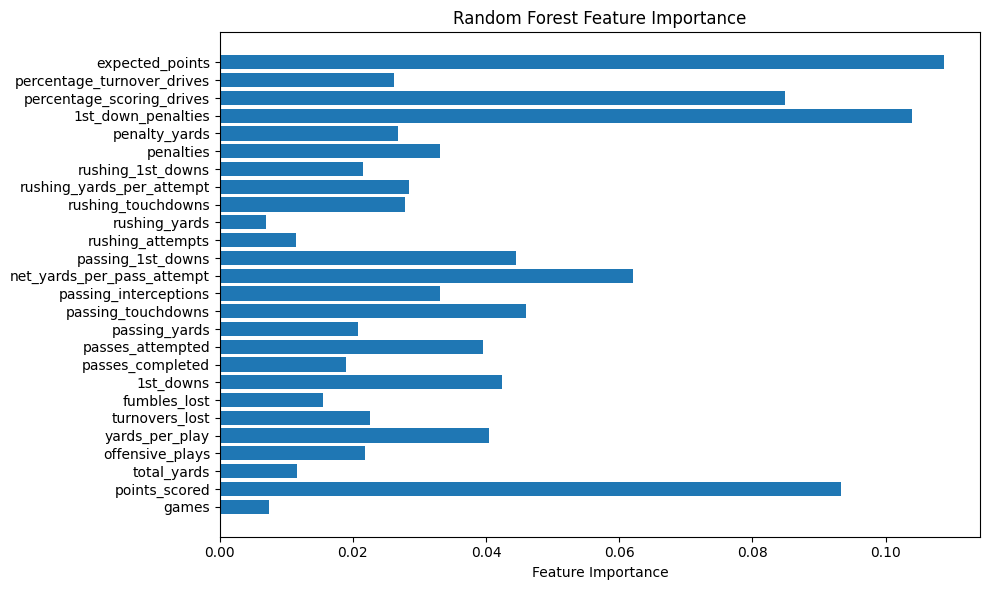

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = clf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()